# Market Basket Analysis for E-Commerce
 
This dataset will be used to perform Market Basket Analysis-a modelig technique.The aim is to efficiently understand the sales and purchasing pattern within items. This helps in identifying items that are frequently purchased together. With this technique, numerous types of businesses will easily predict what items are likely to be purchased together. Apriori Algorithm is the technique used to achieve market basket analysis.


## Data Preparation

Firstly, all the necessary libaries will be imported.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#warnings
import warnings
warnings.filterwarnings('ignore')

Importing the dataset and carrying out some basic data exploration will be the next thing to do. This will include reading the data file, getting the basic information and details about the dataset, checking for null values and data types.

In [2]:
#import your data and get a glimpse of what your dataset looks like
mba = pd.read_csv(r'C:\Users\ADMIN\Desktop\Utiva_Flit_Inc\Market Basket Analysis.csv')
mba

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
#making a copy of our dataset so as to preserve the original dataset for reference purpose.
clean_mba = mba.copy()

In [4]:
clean_mba.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
#checking for null values
clean_mba.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

This indicates that there is no null values in our dataset

In [6]:
#understanding the basic structure of our dataset
clean_mba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Here we noticed that our data column has a wrong data type which will be  corrected later.

## Exploratory Data Analysis

Here, we will be carrying out all necessary corrections and modifications on the dataset.  

In [7]:
#renaming our columns to a more suitable name
clean_mba.rename(columns={'Member_number':'customer_id', 'itemDescription':'item_description', 'Date':'date'}, inplace=True)

clean_mba

,customer_id,date,item_description
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [8]:
#changing date and customer_id columns dtype to datetime and string format respectively
clean_mba['customer_id'] = clean_mba['customer_id'].astype(str)
clean_mba['date'] = pd.to_datetime(clean_mba['date'], format='%d-%m-%Y')

clean_mba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       38765 non-null  object        
 1   date              38765 non-null  datetime64[ns]
 2   item_description  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


In [9]:
#creating new columns -month and year columns respectively for better visualization
clean_mba['month'] = clean_mba['date'].dt.month
clean_mba['year'] = clean_mba['date'].dt.year

clean_mba

,customer_id,date,item_description,month,year
0,1808,2015-07-21,tropical fruit,7,2015
1,2552,2015-01-05,whole milk,1,2015
2,2300,2015-09-19,pip fruit,9,2015
3,1187,2015-12-12,other vegetables,12,2015
4,3037,2015-02-01,whole milk,2,2015
...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,10,2014
38761,2022,2014-02-23,candy,2,2014
38762,1097,2014-04-16,cake bar,4,2014
38763,1510,2014-12-03,fruit/vegetable juice,12,2014


In [10]:
#replacing the values in the month column with categorical variables
clean_mba['month'] = clean_mba['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
clean_mba

,customer_id,date,item_description,month,year
0,1808,2015-07-21,tropical fruit,Jul,2015
1,2552,2015-01-05,whole milk,Jan,2015
2,2300,2015-09-19,pip fruit,Sep,2015
3,1187,2015-12-12,other vegetables,Dec,2015
4,3037,2015-02-01,whole milk,Feb,2015
...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,Oct,2014
38761,2022,2014-02-23,candy,Feb,2014
38762,1097,2014-04-16,cake bar,Apr,2014
38763,1510,2014-12-03,fruit/vegetable juice,Dec,2014


## Market Basket Analysis (MBA)

The Apriori algorithm is the most common technique for performing MBA. Using asscociation rule mining, which is a rule-based process used to identify correlations between items purchased by users. 
Made up of three(3) components:

1) Support: used to access the overall popularity of a given product. Can be calculated as
Support(item considered) = Transactions comprising the item(A) / Total transactions

N/B: High support indicates that the item is present in most purchases and marketers should focus on it more.

2) Confidence: tells us the likelihood of different purchase combination. Can be calculated as
Confidence = Transactions comprising items(A&B) / Transaction comprising item(A)


3) Lift: refers to the increase in the ratio of the sale of item(B) when you sell item(A). Can be calculated as
Lift = Confidence / Support

In [11]:
#firstly, provide a list of items purchased in the same transaction by grouping items that have same customer_id and date
clean_mba['same_transaction'] = clean_mba['customer_id'].astype(str)+'_'+clean_mba['date'].astype(str)
clean_mba

,customer_id,date,item_description,month,year,same_transaction
0,1808,2015-07-21,tropical fruit,Jul,2015,1808_2015-07-21
1,2552,2015-01-05,whole milk,Jan,2015,2552_2015-01-05
2,2300,2015-09-19,pip fruit,Sep,2015,2300_2015-09-19
3,1187,2015-12-12,other vegetables,Dec,2015,1187_2015-12-12
4,3037,2015-02-01,whole milk,Feb,2015,3037_2015-02-01
...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,Oct,2014,4471_2014-10-08
38761,2022,2014-02-23,candy,Feb,2014,2022_2014-02-23
38762,1097,2014-04-16,cake bar,Apr,2014,1097_2014-04-16
38763,1510,2014-12-03,fruit/vegetable juice,Dec,2014,1510_2014-12-03


In [12]:
#secondly, create a resulting table showing how many times each items where purchased in one transaction
clean_mba2 = pd.crosstab(clean_mba['same_transaction'], clean_mba['item_description'])
clean_mba2

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
same_transaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-03-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#putting the purchase frequency into consideration,
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
purchase_freq = clean_mba2.applymap(encode)

In [14]:
#importing apriori and association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

itemsets = apriori(purchase_freq, min_support=0.001, use_colnames=True)

rules = association_rules(itemsets, metric="lift")

rules

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998
...,...,...,...,...,...,...,...,...,...,...
729,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
730,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
731,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596,0.454430
732,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307,0.521727


In [17]:
#getting the most frequently item combinations, sort the dataset by support, confidence and lift

rules.sort_values(["support", "confidence", "lift"], axis = 0, ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
551,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
550,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
649,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
648,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
625,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
624,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


The antecedents and consequents columns shows items that are frequently bought together.

The table above shows that the most popular products combinations that are frequently bought together are:
-rolls/buns and whole milk, yogurt and whole milk, soda and vegetables, sausages and whole milk


## Visualization

Here, we will carry out necessary visualization to explore the trends and patterns in our dataset.

In [18]:
top_products = clean_mba['item_description'].value_counts().head(10)
bottom_products = clean_mba['item_description'].value_counts().tail(10)

print("Top 10 products frequently purchased:")
print(top_products)

print("\nBottom 10 products not frequently purchased")
print(bottom_products)

Top 10 products frequently purchased:
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: item_description, dtype: int64

Bottom 10 products not frequently purchased
whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: item_description, dtype: int64


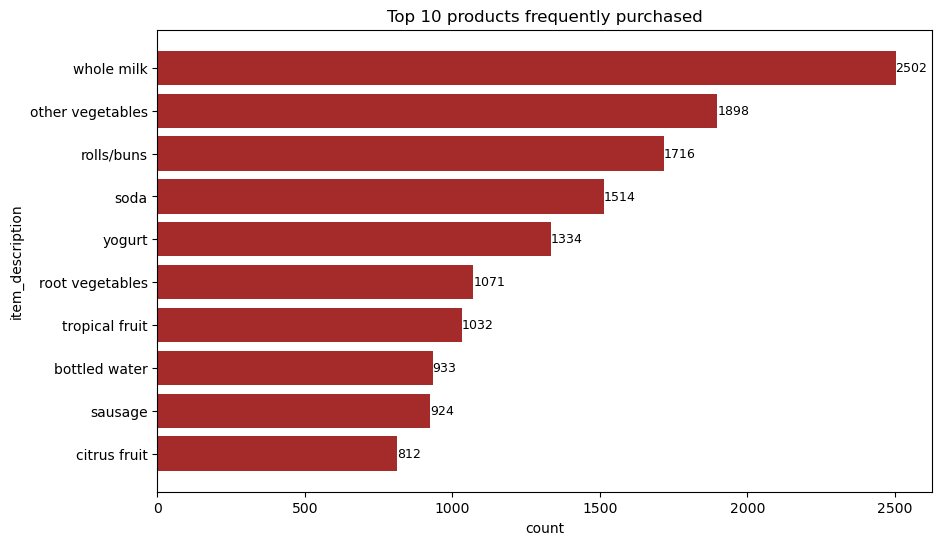

In [19]:
product_count = clean_mba['item_description'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top_products.index, product_count, color='brown')
plt.ylabel('item_description')
plt.xlabel('count')
plt.title('Top 10 products frequently purchased')
plt.gca().invert_yaxis()  #invert the y_axis to display the top products at the top

for item_description, product_count in zip(top_products.index, product_count):
    plt.annotate(f'{product_count}', (product_count, item_description), fontsize=9, va='center')

plt.show()

This bar chat shows the 10 most purchased items in the dataset. Whole milk is seen to be in the top list.

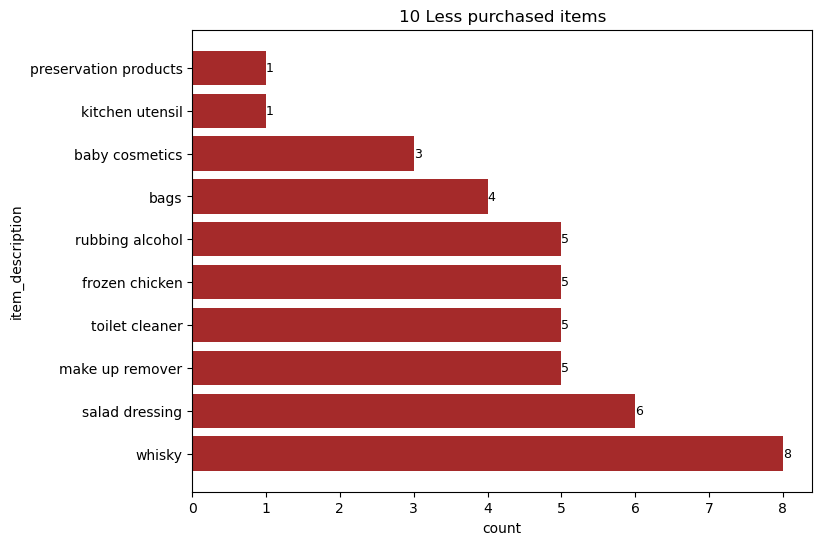

In [20]:
product_count = clean_mba['item_description'].value_counts().tail(10)

plt.figure(figsize=(8,6))
plt.barh(bottom_products.index, product_count, color='brown')
plt.xlabel('count')
plt.ylabel('item_description')
plt.title('10 Less purchased items')

for item_description, product_count in zip(bottom_products.index, product_count):
    plt.annotate(f'{product_count}', (product_count, item_description), fontsize=9, va='center')

    
plt.show()

The items shown in this bar chat are not purchased as frequent as others. This items shouldn't be focused on.

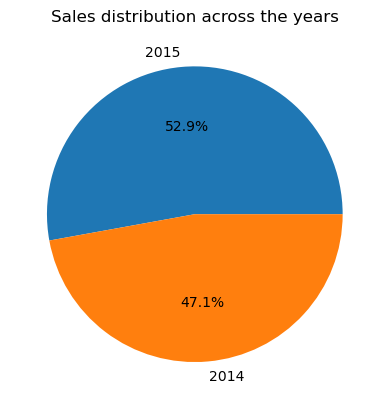

In [21]:
year_counts = clean_mba['year'].value_counts()

plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')
plt.title('Sales distribution across the years')
plt.show()

 This dataset contains transactions for 2 years. 2015 was recorded to have a higher sales compared to the previous year 2014

In [22]:
#finding out which month in 2014 recorded the highest sales
year1 = clean_mba[clean_mba['year']==2014]

year1

,customer_id,date,item_description,month,year,same_transaction
8696,1664,2014-10-01,rolls/buns,Oct,2014,1664_2014-10-01
8697,3942,2014-12-16,hamburger meat,Dec,2014,3942_2014-12-16
8698,2638,2014-10-10,turkey,Oct,2014,2638_2014-10-10
8699,4735,2014-10-10,specialty chocolate,Oct,2014,4735_2014-10-10
8700,3745,2014-12-09,frankfurter,Dec,2014,3745_2014-12-09
...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,Oct,2014,4471_2014-10-08
38761,2022,2014-02-23,candy,Feb,2014,2022_2014-02-23
38762,1097,2014-04-16,cake bar,Apr,2014,1097_2014-04-16
38763,1510,2014-12-03,fruit/vegetable juice,Dec,2014,1510_2014-12-03


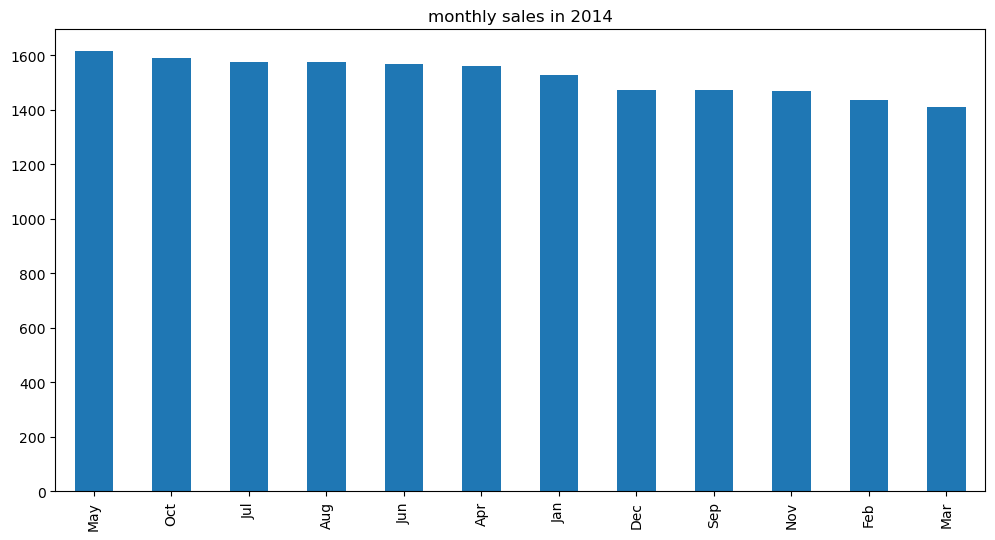

In [23]:
month_count2014 = year1['month'].value_counts()

plt.figure(figsize=(12,6))
month_count2014.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('monthly sales in 2014');

In [24]:
year2 = clean_mba[clean_mba['year']==2015]


year2

,customer_id,date,item_description,month,year,same_transaction
0,1808,2015-07-21,tropical fruit,Jul,2015,1808_2015-07-21
1,2552,2015-01-05,whole milk,Jan,2015,2552_2015-01-05
2,2300,2015-09-19,pip fruit,Sep,2015,2300_2015-09-19
3,1187,2015-12-12,other vegetables,Dec,2015,1187_2015-12-12
4,3037,2015-02-01,whole milk,Feb,2015,3037_2015-02-01
...,...,...,...,...,...,...
37114,1185,2015-08-24,chocolate,Aug,2015,1185_2015-08-24
37115,4656,2015-12-25,newspapers,Dec,2015,4656_2015-12-25
37116,2741,2015-09-11,canned vegetables,Sep,2015,2741_2015-09-11
37117,2654,2015-08-17,coffee,Aug,2015,2654_2015-08-17


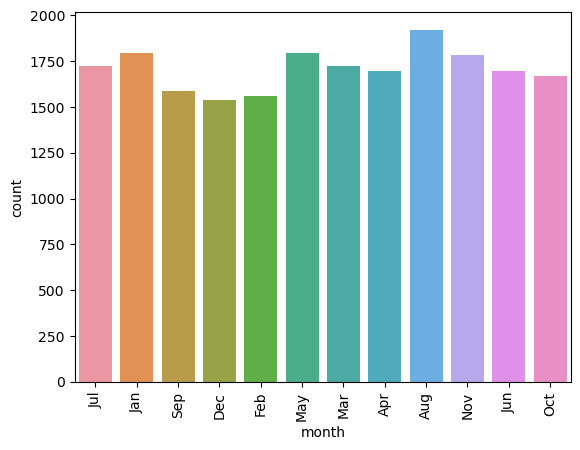

In [25]:
sns.countplot(data=year2, x='month')
plt.xticks(rotation=90);

## Conclusion.

From the above analysis, we saw that in the year 2014, the month of May recorded the highest sales while in the year 2015 the month of August recorded the highest sales. The year 2015 recorded the highest sales in total compared to the year 2014.

We can recommend that the top selling items should always be made available at all times so as not to reduce the purchasing power. The least selling items shouldn't be made priority.  